Importieren der notwendigen Bibliotheken:

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


Laden der Daten aus der .csv Datei:

In [ ]:
df = pd.read_csv('training_data.csv')

Zum anzeigen der Daten:

In [12]:
df.head()

,bottle,vibration_index_red,fill_level_grams_red,vibration_index_blue,fill_level_grams_blue,vibration_index_green,fill_level_grams_green,temperature_green,temperature_red,temperature_blue
0,368,222.532407,54.029687,31.623312,452.512395,213.432202,768.349535,34.128206,33.785852,33.482771
1,369,213.845844,38.183543,23.665775,449.611147,206.611215,752.650021,34.816719,35.235909,33.705332
2,370,215.491497,21.692003,24.171144,446.539818,209.339101,736.637504,33.466064,34.208069,34.578811
3,371,-15.927028,0.000000,25.572354,443.380726,206.280554,721.260426,34.927253,32.963514,33.945167
4,372,-20.639413,0.000000,26.986643,440.127536,199.868098,705.559213,35.687165,35.319707,34.365519


Datenvisualiserung:

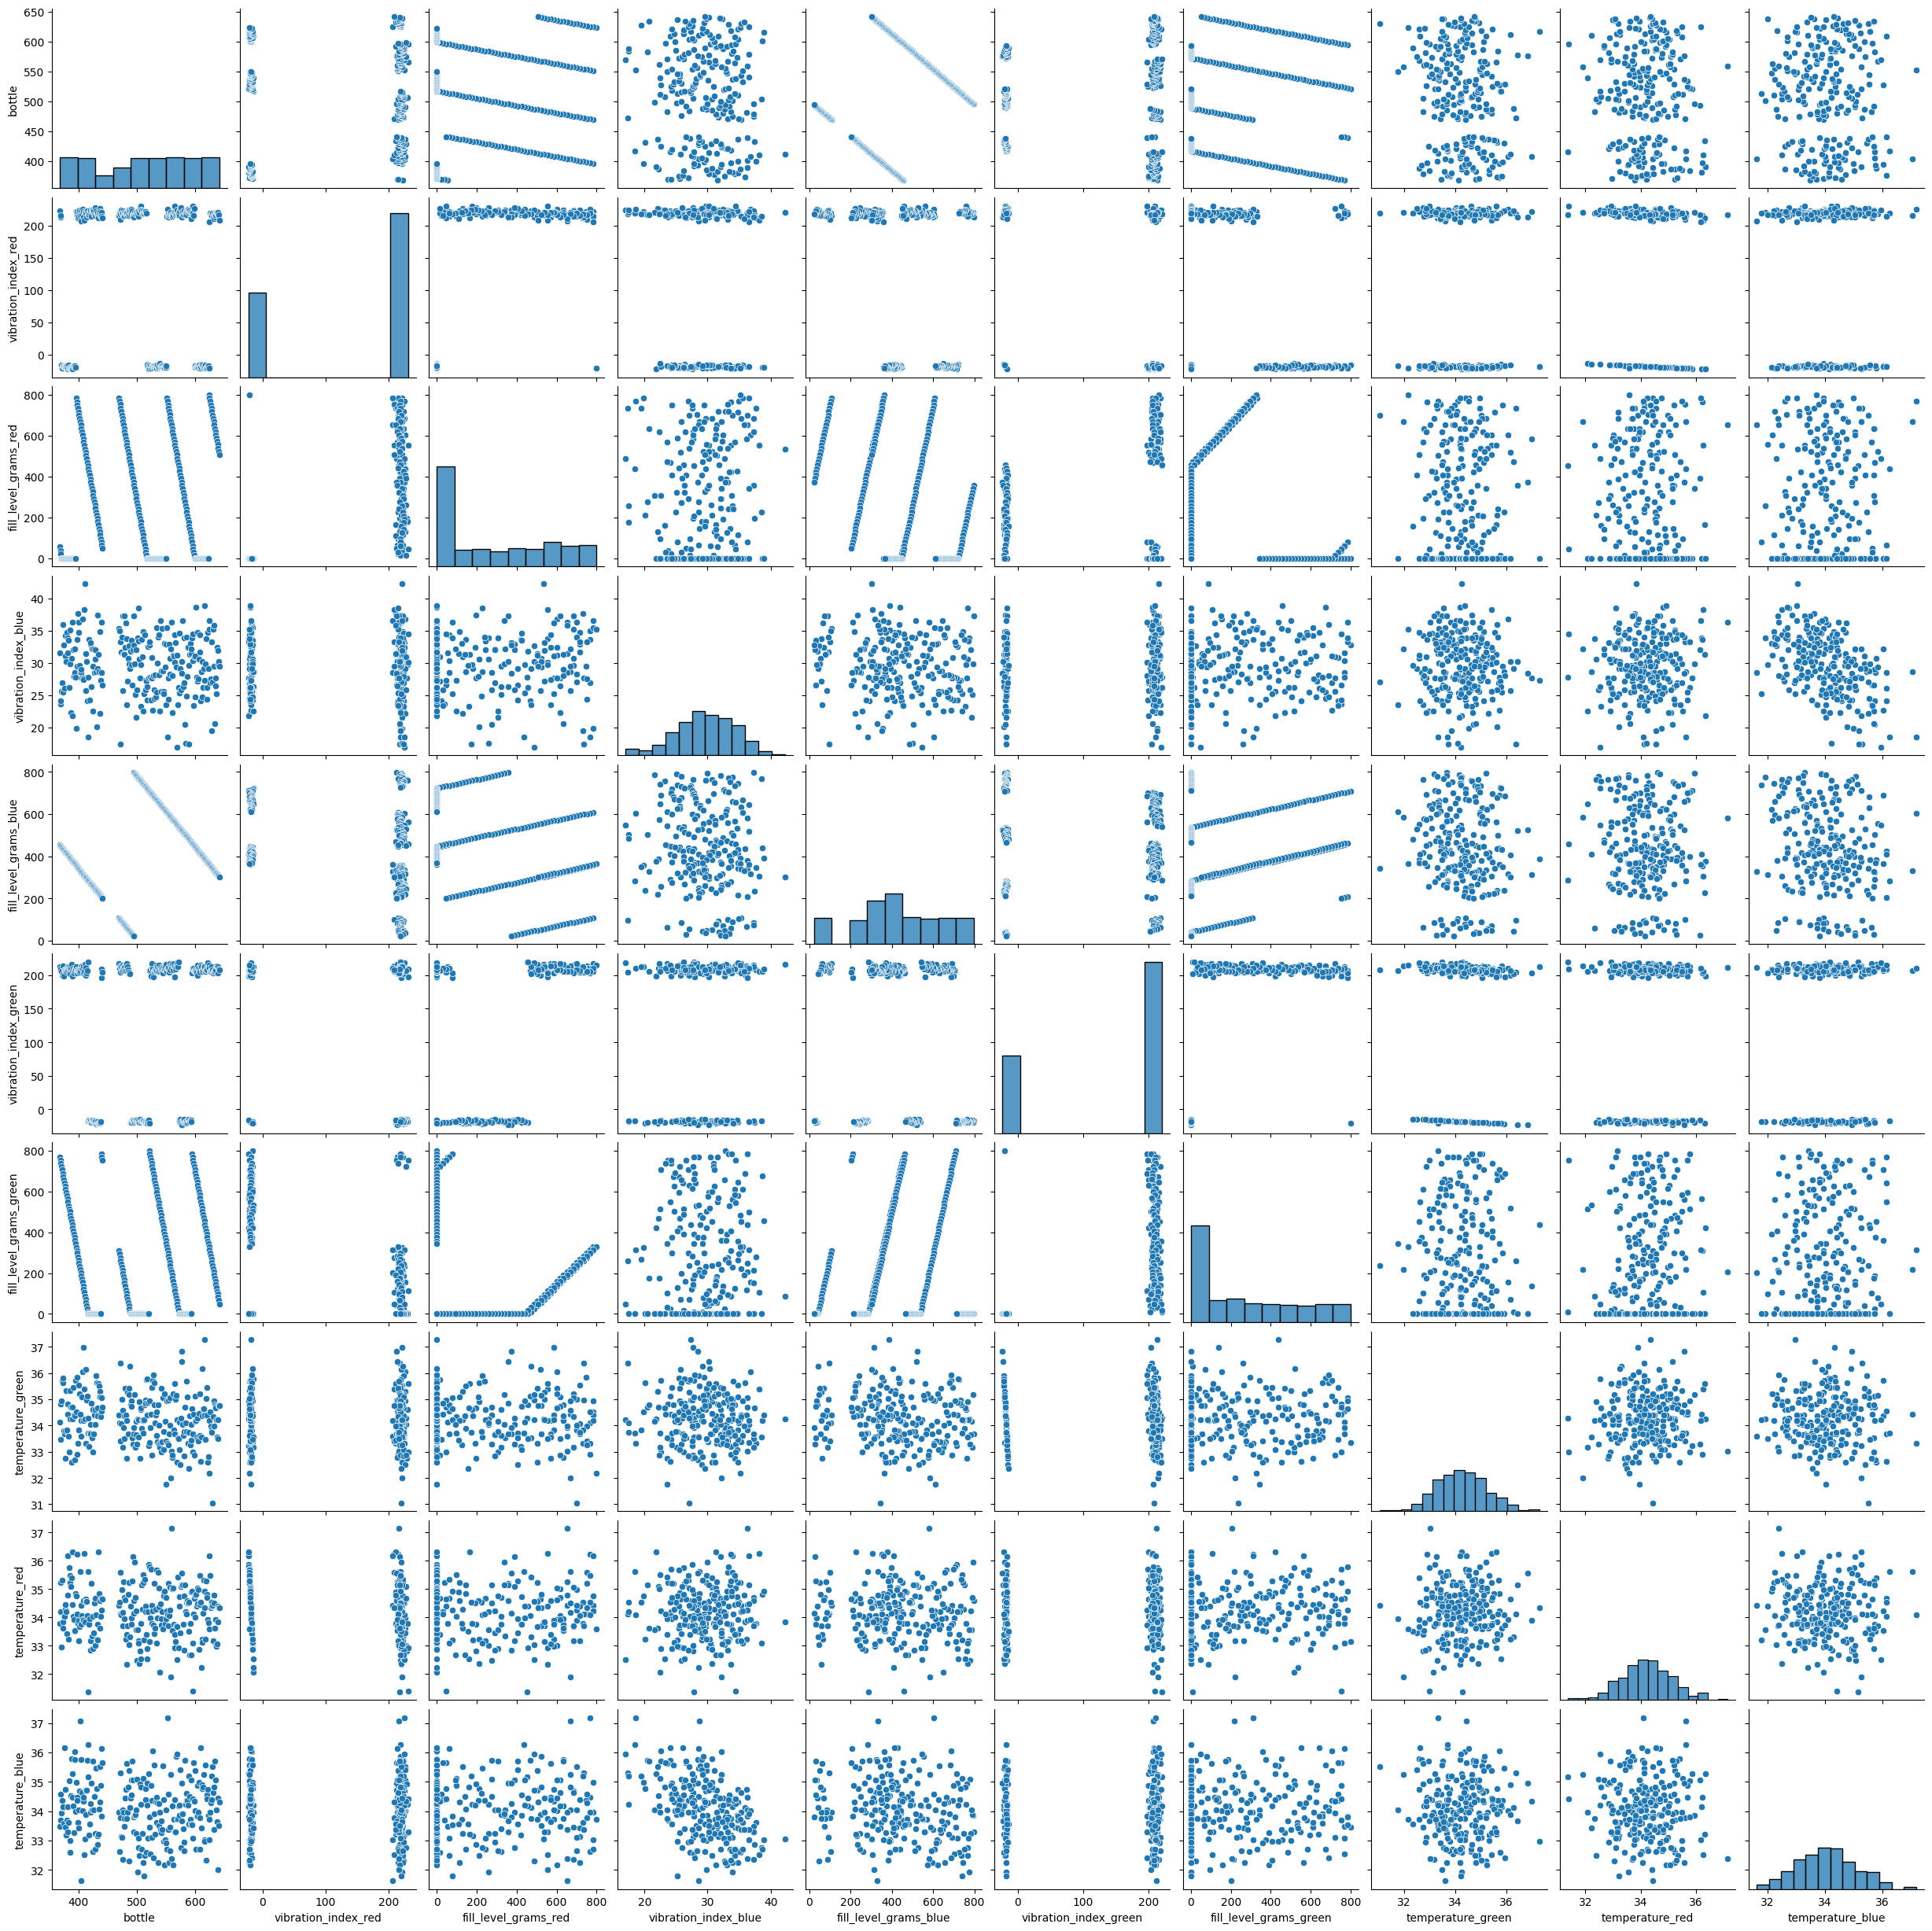

In [13]:
sns.pairplot(df)

Aufteilen der Daten:

In [ ]:
y = df['weigth']
X = df.drop(['weigth'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

Trainieren des Modells:

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

print(model.coef_)

In [ ]:
y_pred = model.predict(X_train)

Evaluieren des Modells auf den Trainingsdaten:

In [ ]:
print("MSE(Trainingsdaten):", mean_squared_error(y_train, y_pred))

Evaluieren des Modells auf den Testdaten:

In [ ]:
y_pred = model.predict(X_test)

print("MSE(Testdaten):", mean_squared_error(y_test, y_pred))

Tabelle, welche die genuzten Spalten (X) für die Vorhersage (y) enthält und den MSE-Wert für die jeweiligen Spalten:

| Genutzte Spalten         | Modell-Typ      | MSE-Wert (Training) | MSE-Wert (Test) |
|--------------------------|-----------------|---------------------|-----------------|
| all                      | Linear          | 0.5                 | 0.6             |
| all                      | ?           | 0.5                 | 0.6             |

Prognase für X.csv Datenset:

In [ ]:
model = LinearRegression()
df2 = pd.read_csv('Testset_X.csv')

y_pred2 = model.predict(df2)

result = pd.DataFrame({'Flaschen ID': df2['Flaschen ID'], 'y_hat': y_pred2})

Generierung eine .csv:

In [ ]:
result.to_csv('reg_52315881-62201247-52315863.csv', index=False)